── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


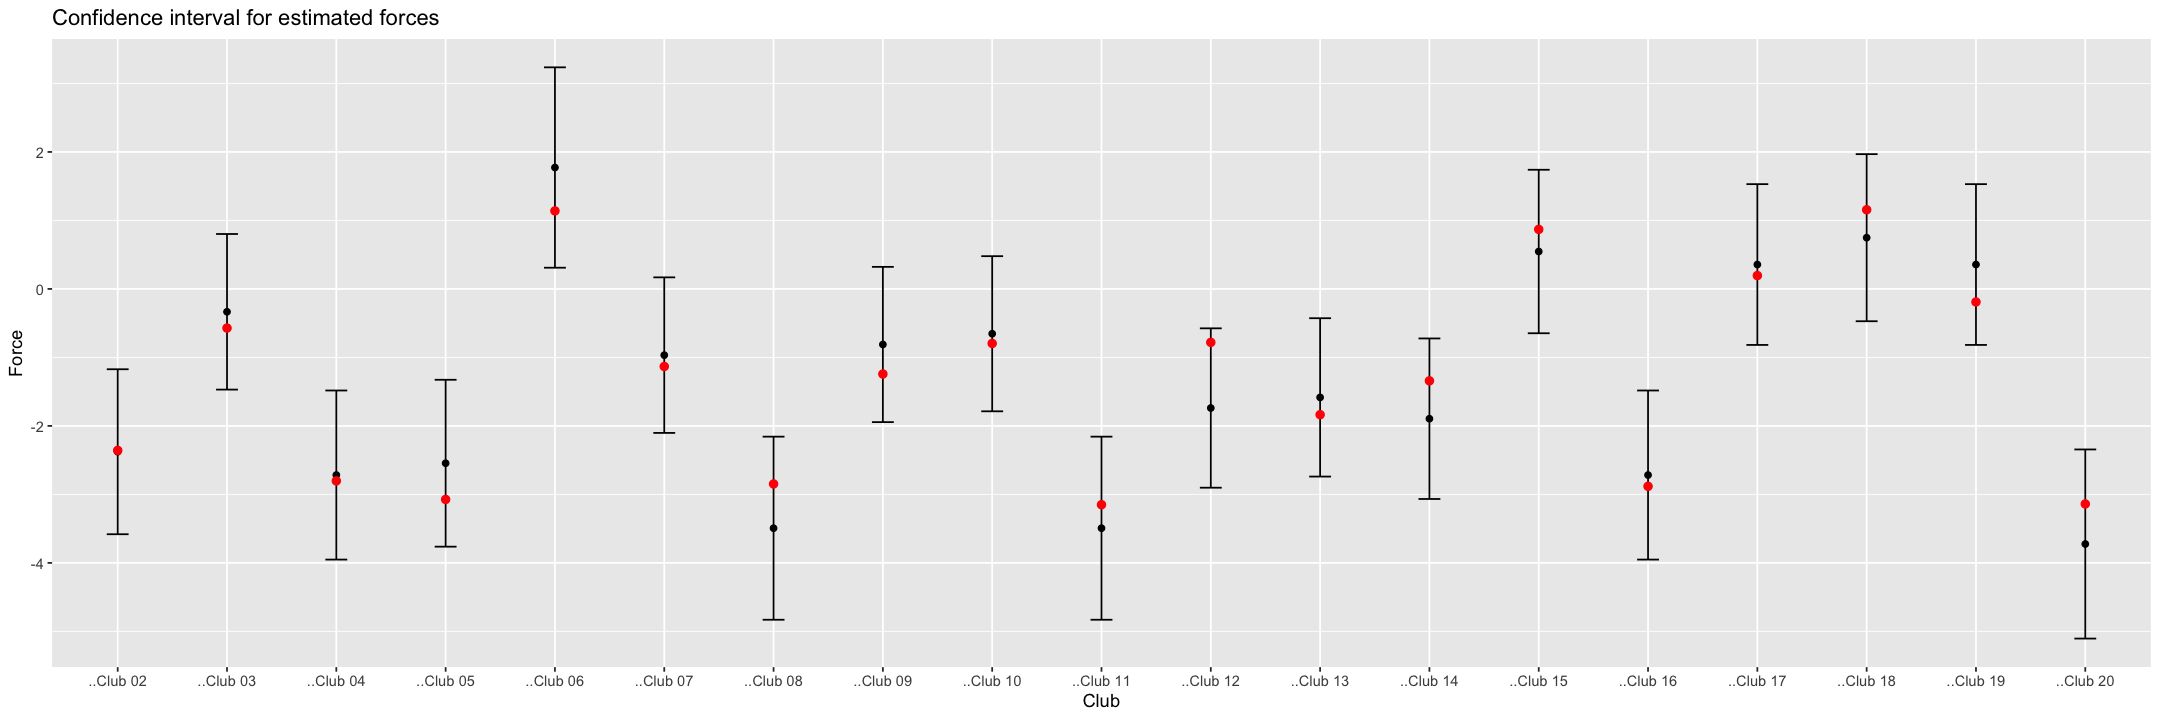

In [1]:
library(tidyverse)
library(BradleyTerry2)

set.seed(123)

n_clubs <- 20
n_seasons <- 1
clubs <- sprintf("Club %02d", 1:n_clubs)
force <- runif(length(clubs), min = -1, max = 1)
force <- force / force[1] - 1
df <- data.frame(Club = clubs, Force = force)
data <- merge(df, df, by = NULL) %>% filter(Club.x != Club.y)
data$prob.home <- exp(data$Force.x) / (exp(data$Force.x) + exp(data$Force.y))
data$home.wins <- 0

for (i in 1:n_seasons) {
    data$random <- runif(380)
    data$home.wins <- data$home.wins + (data$random <  data$prob.home) * 1
}

data$away.wins <- n_seasons - data$home.wins
data <- subset(data, select = -random)
data <- subset(data, select = -prob.home)
names(data) <- c("home_name", "home_force", "away_name", "away_force", "home_wins", "away_wins")

data$home_name <- as.factor(data$home_name)
data$away_name <- as.factor(data$away_name)

data$home_name <- factor(data$home_name, levels = unique(c(levels(data$home_name), levels(data$away_name))))
data$away_name <- factor(data$away_name, levels = unique(c(levels(data$home_name), levels(data$away_name))))

Model1 <- BTm(cbind(data$home_wins, data$away_wins), data$home_name, data$away_name, data = data)

coeficients <- coef(Model1)
parameters_df <- data.frame(
  Club = names(coeficients),
  Estimate = coeficients,
  Lower = coeficients - 1.96 * sqrt(diag(vcov(Model1))),
  Upper = coeficients + 1.96 * sqrt(diag(vcov(Model1)))
)

parameters_df <- parameters_df[order(parameters_df$Club), ]
parameters_df$Force <- df[2:20, "Force"]

options(repr.plot.width = 18, repr.plot.height = 6)

ggplot(parameters_df, aes(x = Club, y = Estimate)) +
  geom_point() +
  geom_errorbar(aes(ymin = Lower, ymax = Upper), width = 0.2, position = position_dodge(0.6)) +
  geom_point(aes(x = Club, y = Force), color = "red", size = 2) +
  labs(title = "Confidence interval for estimated forces", x = "Club", y = "Force")

In [2]:
library(BradleyTerry2)

n_clubs <- 20
n_seasons <- 1

clubs <- sprintf("Club %02d", 1:n_clubs)
forces <- runif(n_clubs)

data <- expand.grid(home_name = clubs, away_name = clubs)
data$const <- "draw"
data <- data[data$home_name != data$away_name, ]

data$home_force <- forces[match(data$home_name, clubs)]
data$away_force <- forces[match(data$away_name, clubs)]

data$prob_home <- exp(data$home_force) / (exp(data$home_force) + 1 + exp(data$away_force))
data$prob_away <- exp(data$away_force) / (exp(data$home_force) + 1 + exp(data$away_force))
data$prob_draw <- 1 - data$prob_home - data$prob_away

data$home_wins <- 0
data$away_wins <- 0
data$draws <- 0
for (i in 1:n_seasons) {
    data$random <- runif(380)
    data$home_wins <- data$home_wins + (data$random < data$prob_home) * 1
    data$away_wins <- data$away_wins + (((1 - data$random) < data$prob_away) & (data$random >= data$prob_home)) * 1
    data$draws <- data$draws + (((1 - data$random) >= data$prob_away) & (data$random >= data$prob_home)) * 1
}

data

,home_name,away_name,const,home_force,away_force,prob_home,prob_away,prob_draw,home_wins,away_wins,draws,random
,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Club 02,Club 01,draw,0.13706747,0.9860543,0.2375755,0.5552798,0.2071447,0,1,0,0.54745947
3,Club 03,Club 01,draw,0.90530958,0.9860543,0.4018468,0.4356397,0.1625135,0,1,0,0.64424022
4,Club 04,Club 01,draw,0.57630184,0.9860543,0.3259009,0.4909517,0.1831474,0,1,0,0.59626354
5,Club 05,Club 01,draw,0.39544886,0.9860543,0.2874837,0.5189313,0.1935851,0,0,1,0.32193738
6,Club 06,Club 01,draw,0.44980248,0.9860543,0.2987446,0.5107298,0.1905256,0,1,0,0.89111431
7,Club 07,Club 01,draw,0.70650190,0.9860543,0.3551257,0.4696671,0.1752073,0,1,0,0.62625695
8,Club 08,Club 01,draw,0.08250275,0.9860543,0.2278339,0.5623747,0.2097915,0,0,1,0.30290492
9,Club 09,Club 01,draw,0.33931258,0.9860543,0.2761234,0.5272050,0.1966716,0,0,1,0.38820466
10,Club 10,Club 01,draw,0.68078755,0.9860543,0.3492589,0.4739398,0.1768012,1,0,0,0.16047509


In [3]:
results_matrix <- cbind(data$home_wins + data$draws, data$away_wins + data$draws)

Model <- BTm(results_matrix, data$home_name, data$away_name)
summary(Model)


Call:
BTm(outcome = results_matrix, player1 = data$home_name, player2 = data$away_name)

Coefficients:
          Estimate Std. Error z value Pr(>|z|)   
..Club 02 -0.61988    0.41599  -1.490  0.13619   
..Club 03 -0.56386    0.41596  -1.356  0.17523   
..Club 04 -0.77224    0.42889  -1.801  0.07177 . 
..Club 05 -0.82471    0.40337  -2.045  0.04090 * 
..Club 06 -0.39542    0.41252  -0.959  0.33778   
..Club 07 -0.41380    0.42327  -0.978  0.32826   
..Club 08 -0.78025    0.40615  -1.921  0.05472 . 
..Club 09 -0.44463    0.40412  -1.100  0.27123   
..Club 10 -0.78215    0.42919  -1.822  0.06840 . 
..Club 11 -0.29654    0.41365  -0.717  0.47344   
..Club 12 -0.32692    0.42391  -0.771  0.44059   
..Club 13 -0.68422    0.40729  -1.680  0.09297 . 
..Club 14 -0.68913    0.41476  -1.662  0.09661 . 
..Club 15 -1.13934    0.42571  -2.676  0.00744 **
..Club 16 -0.36622    0.40843  -0.897  0.36990   
..Club 17  0.01789    0.43356   0.041  0.96708   
..Club 18 -1.14547    0.42699  -2.683  0.00730